<a href="https://colab.research.google.com/github/goldenbear7/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Bjorn_Lestrud_DS_Unit_1_Sprint_Challenge_1_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 1 - Load and Explore the Data

Run the cell below to load the datasets into three dataframes and then follow the instructions below


In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

geo_country_codes = geo_country_codes[['geo','country']]

In [2]:
cell_phones.sample()

,geo,time,cell_phones_total
4367,ken,1981,0.0


In [3]:
population.sample()

,geo,time,population_total
29873,lbr,1874,492066


Check for missing/null values in the three dataframes

In [4]:
cell_phones.isnull().sum()

geo                  0
time                 0
cell_phones_total    0
dtype: int64

In [5]:
population.isnull().sum()

geo                 0
time                0
population_total    0
dtype: int64

In [6]:
geo_country_codes.isnull()


,geo,country
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
268,False,False
269,False,False
270,False,False
271,False,False


Make a scatter plot from the `cell_phones` dataframe plotting "time" against "cell_phones_total"

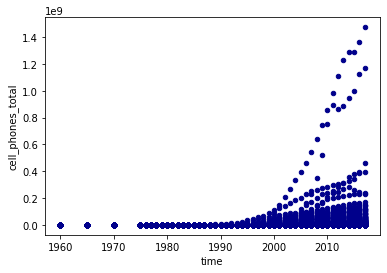

In [8]:
cell_phones.plot.scatter(x='time', y='cell_phones_total', c='DarkBlue');

### Part 2 - Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [9]:
cell_phones.shape

(9215, 3)

In [10]:
population.shape

(59297, 3)

In [11]:
merged = pd.merge(cell_phones, population, on=['geo', 'time'], how='inner')
merged.shape

(8590, 4)

Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [12]:
geo_country_codes

,geo,country
0,abkh,Abkhazia
1,abw,Aruba
2,afg,Afghanistan
3,ago,Angola
4,aia,Anguilla
...,...,...
268,yem_south,South Yemen (former)
269,yug,Yugoslavia
270,zaf,South Africa
271,zmb,Zambia


In [31]:
merged.columns


Index(['geo', 'time', 'cell_phones_total', 'population_total'], dtype='object')

In [34]:
geo_countries = pd.DataFrame({'geo_country_codes': ['geo', 'country']})
geo_countries.shape

(2, 1)

In [13]:
merged1 = pd.merge(merged, geo_country_codes, on='geo', how='left')
merged1.shape

(8590, 5)

In [14]:
merged1.columns

Index(['geo', 'time', 'cell_phones_total', 'population_total', 'country'], dtype='object')

### Part 3 - Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [20]:
# merged1['per_person']



merged1['per_persons'] = merged1['population_total'] / merged1['cell_phones_total']

merged1['per_persons'].sample(5)




6       inf
3189    inf
813     inf
2277    inf
7492    inf
Name: per_persons, dtype: float64

In [27]:
merged1[['time', 'per_persons']].tail(20)

,time,per_persons
8570,1998,625.961684
8571,1999,69.336420
8572,2000,45.872261
8573,2001,39.382440
8574,2002,36.898760
8575,2003,34.741818
8576,2004,30.012122
8577,2005,19.996650
8578,2006,15.455843
8579,2007,10.875752


In [28]:
merged1.sample(50)

,geo,time,cell_phones_total,population_total,country,per_persons
2997,gmb,2015,2715672.0,1977590,Gambia,0.728214
7121,sur,1970,0.0,371273,Suriname,inf
904,blr,1970,0.0,8977639,Belarus,inf
4666,lso,1995,0.0,1761359,Lesotho,inf
2684,fsm,1975,0.0,63144,"Micronesia, Fed. Sts.",inf
2529,eth,2004,155534.0,74624405,Ethiopia,479.794804
2043,deu,2016,103470000.0,81914672,Germany,0.791676
3772,isl,2010,341077.0,320328,Iceland,0.939166
1798,cpv,2001,31507.0,443716,Cape Verde,14.083093
1127,brb,2014,305456.0,283385,Barbados,0.927744


### Part 4 - Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [90]:
merged1.shape

(8590, 5)

In [93]:
merged1.tail(20)

,geo,time,cell_phones_total,population_total,country
8570,zwe,1998,19000.0,11893272,Zimbabwe
8571,zwe,1999,174000.0,12064537,Zimbabwe
8572,zwe,2000,266441.0,12222251,Zimbabwe
8573,zwe,2001,314002.0,12366165,Zimbabwe
8574,zwe,2002,338779.0,12500525,Zimbabwe
8575,zwe,2003,363651.0,12633897,Zimbabwe
8576,zwe,2004,425745.0,12777511,Zimbabwe
8577,zwe,2005,647110.0,12940032,Zimbabwe
8578,zwe,2006,849146.0,13124267,Zimbabwe
8579,zwe,2007,1225654.0,13329909,Zimbabwe


In [88]:
merged1['time'].head()

0    1960
1    1965
2    1970
3    1975
4    1976
Name: time, dtype: int64

In [85]:
merged1['time'].tail()


8585    2013
8586    2014
8587    2015
8588    2016
8589    2017
Name: time, dtype: int64

In [56]:
merged1.describe()

,time,cell_phones_total,population_total
count,8590.000000,8.590000e+03,8.590000e+03
mean,1994.193481,9.004950e+06,2.983823e+07
std,14.257975,5.573408e+07,1.161284e+08
min,1960.000000,0.000000e+00,4.433000e+03
25%,1983.000000,0.000000e+00,1.456148e+06
50%,1995.000000,6.200000e+03,5.725062e+06
75%,2006.000000,1.697652e+06,1.810581e+07
max,2017.000000,1.474097e+09,1.409517e+09


In [58]:
merged1.columns

Index(['geo', 'time', 'cell_phones_total', 'population_total', 'country'], dtype='object')

In [61]:
merged1['geo'].dtype

dtype('O')

In [63]:
merged1['time'].dtype

dtype('int64')

In [76]:
merged1.dtypes

geo                   object
time                   int64
cell_phones_total    float64
population_total       int64
country               object
dtype: object

In [79]:
merged1[['time', 'cell_phones_total', 'population_total']].describe()

,time,cell_phones_total,population_total
count,8590.000000,8.590000e+03,8.590000e+03
mean,1994.193481,9.004950e+06,2.983823e+07
std,14.257975,5.573408e+07,1.161284e+08
min,1960.000000,0.000000e+00,4.433000e+03
25%,1983.000000,0.000000e+00,1.456148e+06
50%,1995.000000,6.200000e+03,5.725062e+06
75%,2006.000000,1.697652e+06,1.810581e+07
max,2017.000000,1.474097e+09,1.409517e+09


In [80]:
merged1[['geo', 'country']].describe()

,geo,country
count,8590,8590
unique,195,195
top,slb,"Macedonia, FYR"
freq,46,46


In [73]:
merged1['geo'].nunique()

195

In [75]:
merged1['country'].nunique()


195

In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |


In [0]:
new_toy = merged1[merged1.isin([2017]).any(axis=1)]

In [98]:
new_toy.sample()

,geo,time,cell_phones_total,population_total,country
8406,wsm,2017,124211.0,196440,Samoa


In [104]:
new_toy.sort_values(by='cell_phones_total', ascending=False)

,geo,time,cell_phones_total,population_total,country
1496,chn,2017,1.474097e+09,1409517397,China
3595,ind,2017,1.168902e+09,1339180127,India
3549,idn,2017,4.589232e+08,263991379,Indonesia
8134,usa,2017,3.958810e+08,324459463,United States
1084,bra,2017,2.364885e+08,209288278,Brazil
...,...,...,...,...,...
4596,lie,2017,4.662500e+04,37922,Liechtenstein
4220,kir,2017,4.612300e+04,116398,Kiribati
7005,smr,2017,3.800000e+04,33400,San Marino
4918,mco,2017,3.297800e+04,38695,Monaco


Answer: China, India, Indonesia, United States, Brazil

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:

- You can make a crosstab. 
- You're going to want occupations as the column indexes and years as the row indexes
- Use the `normalize` parameter to get percentages by year.

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

In [200]:
fun_crosstab = pd.crosstab(df.Occupation, df.Year, normalize='columns')*100
fun_crosstab

Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Occupation,,,,,,,,,,,,,,,,,
"Acting, Comedy & Music",90.361446,73.964497,72.611465,62.264151,56.024096,38.414634,37.037037,36.024845,25.531915,20.731707,20.858896,35.151515,33.742331,26.829268,42.771084,39.263804,45.0
Government and Politics,1.204819,8.284024,3.821656,6.918239,10.240964,22.560976,16.049383,19.254658,17.021277,20.121951,20.858896,18.181818,16.564417,20.121951,12.650602,12.883436,17.0
Media,6.626506,12.426036,19.745223,26.415094,24.698795,27.439024,33.333333,29.192547,33.333333,46.951220,36.196319,30.303030,31.288344,31.707317,30.722892,32.515337,24.0
Other,1.807229,5.325444,3.821656,4.402516,9.036145,11.585366,13.580247,15.527950,24.113475,12.195122,22.085890,16.363636,18.404908,21.341463,13.855422,15.337423,14.0


In [201]:
fun_crosstab.shape

(4, 17)

### Part 2 — Recreate this explanatory visualization:



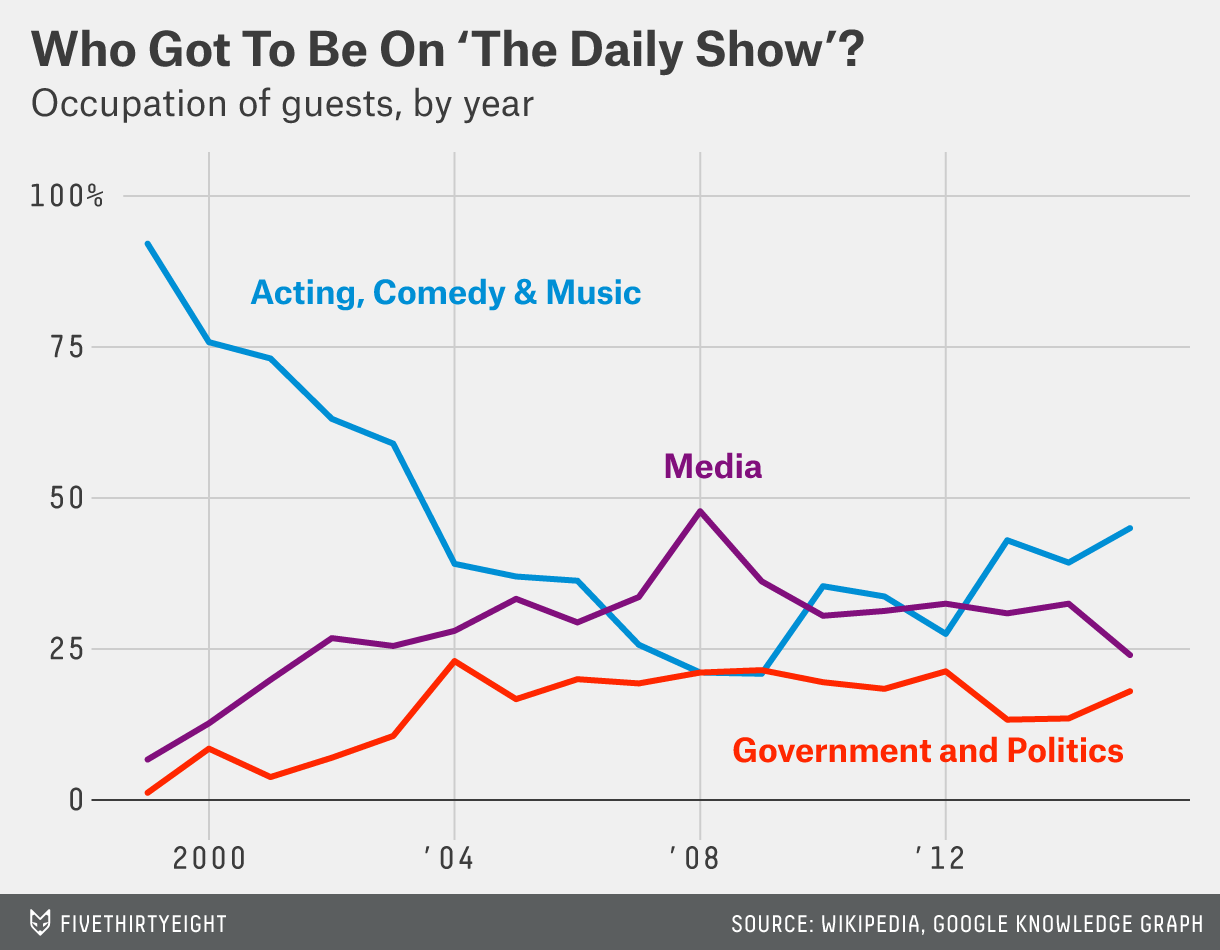

In [202]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend **or** labels for the lines. (But **you don't need each label positioned next to its line or colored like 538.**)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

In [0]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [204]:
df.columns

Index(['Year', 'GoogleKnowlege_Occupation', 'Show', 'Group', 'Guest',
       'Occupation'],
      dtype='object')

In [174]:
df['Group'].unique()

array(['Acting', 'Comedy', 'Musician', 'Media', nan, 'Politician',
       'Athletics', 'Business', 'Advocacy', 'Political Aide', 'Misc',
       'Academic', 'Government', 'media', 'Clergy', 'Science',
       'Consultant', 'Military'], dtype=object)

In [172]:
df['Occupation'].unique()

array(['Acting, Comedy & Music', 'Media', 'Other',
       'Government and Politics'], dtype=object)

In [0]:
new_crosstab = pd.crosstab(df.Year, df.Occupation, normalize='index')*100


In [0]:
year = new_crosstab.index.tolist()

In [0]:
# Setting FiveThirtyEight style
plt.style.use('fivethirtyeight')

# Setting size of our plot
fig, ax = plt.subplots(figsize=(8,6))

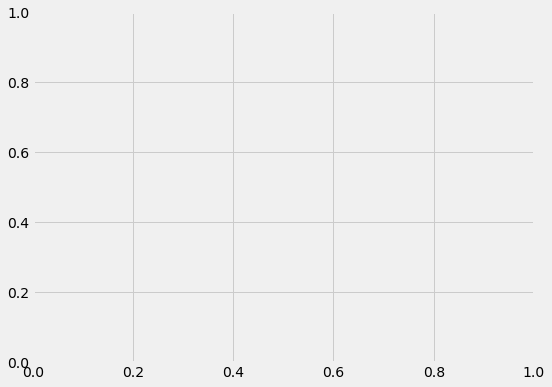

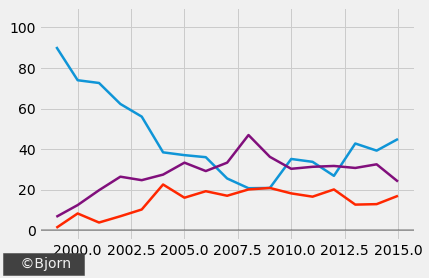

In [213]:
# Plotting each occupation category
ax1 = sns.lineplot(x=year, y=new_crosstab['Acting, Comedy & Music'].tolist(), color='#0F95D7', lw=2.5)
ax2 = sns.lineplot(x=year, y=new_crosstab['Government and Politics'].tolist(), color='#FF2700', lw=2.5)
ax3 = sns.lineplot(x=year, y=new_crosstab['Media'].tolist(), color='#810F7C', lw=2.5)

plt.ylim(-5,110)

ax1.axhline(y=0, color='#414141', linewidth=1.5, alpha=.5);

ax.set_yticks([0, 25, 50, 75, 100])
ax.set_yticklabels(labels=['0', '25', '50', '75', '100%'], fontsize=14, color='#414141')

ax.set_xticks([2000, 2004, 2008, 2012])
ax.set_xticklabels(['2000', '2004', '20008', '2012'], fontsize=14, color='#414141')

ax.text(x=1996.7, y=118, s="Who Got to Be On 'The Daily Show'?", fontsize=18.5, fontweight='semibold', color='#414141')
ax.text(x=1996.7, y=112, s='Occupation of guests, by year', fontsize=16.5, color='#414141')

ax.text(x=2000.5, y=81, s="Acting, Comedy & Music", fontsize=13, fontweight='semibold', color='#0F95D7')
ax.text(x=2008.5, y=6, s="Government and Politics", fontsize=13, fontweight='semibold', color='#FF2700')
ax.text(x=2007.1, y=52, s="Media", fontsize=13, fontweight='semibold', color='#810F7C')

ax1.text(x = 1996.7, y = -18.5,
    s = '   ©Bjorn  ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = '#414141');


In [0]:
ax1.axhline(y=0, color='#414141', linewidth=1.5, alpha=.5);

In [194]:
ax.set_yticks([0, 25, 50, 75, 100])
ax.set_yticklabels(labels=['0', '25', '50', '75', '100%'], fontsize=14, color='#414141')

[Text(0, 0.0, '0'),
 Text(0, 0.2, '25'),
 Text(0, 0.4, '50'),
 Text(0, 0.6000000000000001, '75'),
 Text(0, 0.8, '100%')]

In [195]:
ax.set_xticks([2000, 2004, 2008, 2012])
ax.set_xticklabels(['2000', '2004', '20008', '2012'], fontsize=14, color='#414141')

[Text(0.0, 0, '2000'),
 Text(0.2, 0, '2004'),
 Text(0.4, 0, '20008'),
 Text(0.6000000000000001, 0, '2012')]

In [196]:
ax.text(x=1996.7, y=118, s="Who Got to Be On 'The Daily Show'?", fontsize=18.5, fontweight='semibold', color='#414141')


Text(1996.7, 118, "Who Got to Be On 'The Daily Show'?")

In [197]:
ax.text(x=1996.7, y=112, s='Occupation of guests, by year', fontsize=16.5, color='#414141')


Text(1996.7, 112, 'Occupation of guests, by year')

In [198]:
ax.text(x=2000.5, y=81, s="Acting, Comedy & Music", fontsize=13, fontweight='semibold', color='#0F95D7')
ax.text(x=2008.5, y=6, s="Government and Politics", fontsize=13, fontweight='semibold', color='#FF2700')
ax.text(x=2007.1, y=52, s="Media", fontsize=13, fontweight='semibold', color='#810F7C')

Text(2007.1, 52, 'Media')

In [0]:
ax1.text(x = 1996.7, y = -18.5,
    s = '   ©Bjorn  ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = '#414141');

## How to get a 3 on this Sprint Challenge:

Once you have completed the above making a solid attempt at each section, if you still have time remaining, you can go back and do any of the following to get a score of 3 on the above sections. Remember that everything in this section is **optional** and that we will average your scores between the different sections, so get the easy points first!

Complete any of the following **within** their corresponding sections in the Sprint Challenge (go back up and add these thigns):

### Data Wrangling Section 1

Filter the `cell_phones` dataframe to only include information about the USA and China and then remake the scatterplot. 

### Data Wrangling Section 2

Explain why we are using an "inner" join when we merge these dataframes. 

### Data Wrangling Section 3

Modify the geo column to make the geo codes uppercase instead of lowercase.

### Data Wrangling Section 4

2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

### Data Storytelling 

Keep on working on your graph to make it look particularly like the 538 graph by manipulating the graph's background color, the line colors, the x and y axis tick marks/labels, and adding a subtitle. 

If you have already completed everything else, take this as far as you can within the time limit.


In [0]:
#Data Wrangling Section 1 ---- 

cell_phones_smaller = cell_phones.loc[[]]

In [0]:
#Data Wrangling Section 2 ---- the data is only relevant when there are common values

In [218]:
#Data Wrangling Section 3

geo_country_codes['geo'] = geo_country_codes['geo'].str.upper()
geo_country_codes['geo'].sample()

39    CAN
Name: geo, dtype: object

In [0]:
#Data Wrangling Section 4

